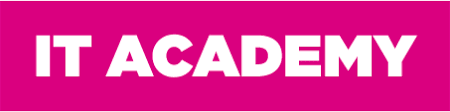

<div class="alert alert-block alert-info">\begin{align*}Alex\:Kumenius - Business\hspace{2mm}Intelligence\hspace{2mm}and\hspace{2mm}Data\hspace{2mm}Scientist\end{align*}
<br/><br/>
\begin{align*}Date : Abril\hspace{2mm}19^{th}\hspace{2mm}2021\end{align*}</div>

# <span style=color:darkblue>Introduction to Linear Regression</span>

<span style=color:blue><b>Simple or single-variate linear regression</b></span> is the simplest case of linear regression with a <span style=color:blue><b>single independent variable, $\:x\:$</b></span>.

<div class="alert alert-block alert-warning"><b><u>Linear regression</u></b><br>   
<br/><br/>
<span style=color:blue><b><u>Linear regression</u></b></span> assumes that the relationship <b>between two variables</b>, <span style=color:blue>$\:x\:$</span> and <span style=color:blue>$\:y\:$</span>, can be modeled by a <b>straight line</b> :<br>   
<br/><br/>
\begin{align*}y\:=\:\beta_0\:+\:\beta_1x\:+\:\epsilon\end{align*}<br>   
<br/><br/>
where $\:\beta_0\:$ and $\:\beta_1\:$ represent <i>two model parameters</i>, the <b><u>regression coefficients</u></b> ($\:\beta\:$ is the Greek letter $beta$). These <b>parameters</b> are estimated using data, and we write their <span style=color:blue>point estimates</span> as <span style=color:blue>$b_0\:$</span> and <span style=color:blue>$b_1\:$</span> and $\:\epsilon\:$ is the <b><u>random error</u></b><br>.   
<br/><br/>
When we use <span style=color:blue>$\:x\:$</span> (<b>input</b> data) to predict <span style=color:blue>$\:y\:$</span> (<b>outputs</b>), we can call <span style=color:blue>$\:x\:$</span> the <b>explanatory</b>, <b>predictor</b> or <b>independent</b> variable, and we call <span style=color:blue>$\:y\:$</span> the <b>response</b> or <b>dependent</b> variable.
</div>

In [57]:
# import libraries needed
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import researchpy as rp
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split

from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## <span style=color:red><u>1 STEP:</u> EXPLORATORY ANALYSIS</span>

## <span style=color:red><u>2 STEP:</u> CLEANING DATA /  transforming</span>

## <span style=color:red><u>3 STEP</u> : CHECK and APPLY NORMALITY CRITERIAS / INFERENCE                                                   NUMERICAL</span>

## <span style=color:darkgreen>Correlation, Residuals, and Line Fitting</span>

### <span style=color:darkred>Describing linear relationships with correlation</span>

we <span style=color:blue>examine <b>criteria</b></span> for identifying a <span style=color:blue><b>linear model</b></span> and introduce a new statistic, <span style=color:blue><i>correlation</i></span>.   

<div class="alert alert-block alert-warning"><u><b>Correlation :</b> strength of a linear relationship</u><br>
<br/><br/>
<b>Correlation</b>, which always takes values <b>between -1 and 1</b>, describes the <b>strength</b> of the <b>linear relationship</b> between <b>two variables</b>. We denote the <b>correlation</b> by $\:R\:$.<br>
<br/><br/>
Only when the <b><i>relationship is perfectly linear</i></b> is the <b>correlation</b> either <b>-1</b> or <b>1</b>.<br>
<br/><br/>
If the relationship is <b>strong</b> and <b>positive</b>, the <b>correlation</b> will be <b>near +1.</b><br>
<br/><br/>
- If it is <b>strong</b> and <b>negative</b>, it will be <b>near -1</b>.   
- If there is <b><u>no apparent linear relationship</u></b> between the <b>variables</b>, then the <b>correlation</b> will be <b>near zero</b>.
</div>

In [58]:
# Load dataset
county = pd.read_csv('D:\\Documents\\00 BIDDLS\\01 BIDDLS Project PORTFOLIO\\01 BIDDLS_Projects DONE\\01 Formacion Eurecat\\BIDDLS Eurecat 2019\\BTS\\Datasets\\county.txt', sep='\t', encoding='utf-8')
county.head()

,name,state,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
0,Autauga County,Alabama,43671.0,54571,6.068095,10.6,77.5,7.2,24568,53255
1,Baldwin County,Alabama,140415.0,182265,6.139862,12.2,76.7,22.6,26469,50147
2,Barbour County,Alabama,29038.0,27457,8.752158,25.0,68.0,11.1,15875,33219
3,Bibb County,Alabama,20826.0,22915,7.122016,12.6,82.9,6.6,19918,41770
4,Blount County,Alabama,51024.0,57322,5.130910,13.4,82.0,3.7,21070,45549


In [59]:
county.shape

(3143, 10)

In [60]:
county.corr().round(3)

,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
pop2000,1.000,0.995,-0.001,-0.074,-0.273,0.469,0.273,0.248
pop2010,0.995,1.000,-0.009,-0.082,-0.271,0.468,0.281,0.263
fed_spend,-0.001,-0.009,1.000,0.058,-0.207,0.134,0.067,-0.016
poverty,-0.074,-0.082,0.058,1.000,-0.322,-0.085,-0.702,-0.742
homeownership,-0.273,-0.271,-0.207,-0.322,1.000,-0.672,-0.023,0.067
multiunit,0.469,0.468,0.134,-0.085,-0.672,1.000,0.439,0.340
income,0.273,0.281,0.067,-0.702,-0.023,0.439,1.000,0.870
med_income,0.248,0.263,-0.016,-0.742,0.067,0.340,0.870,1.000


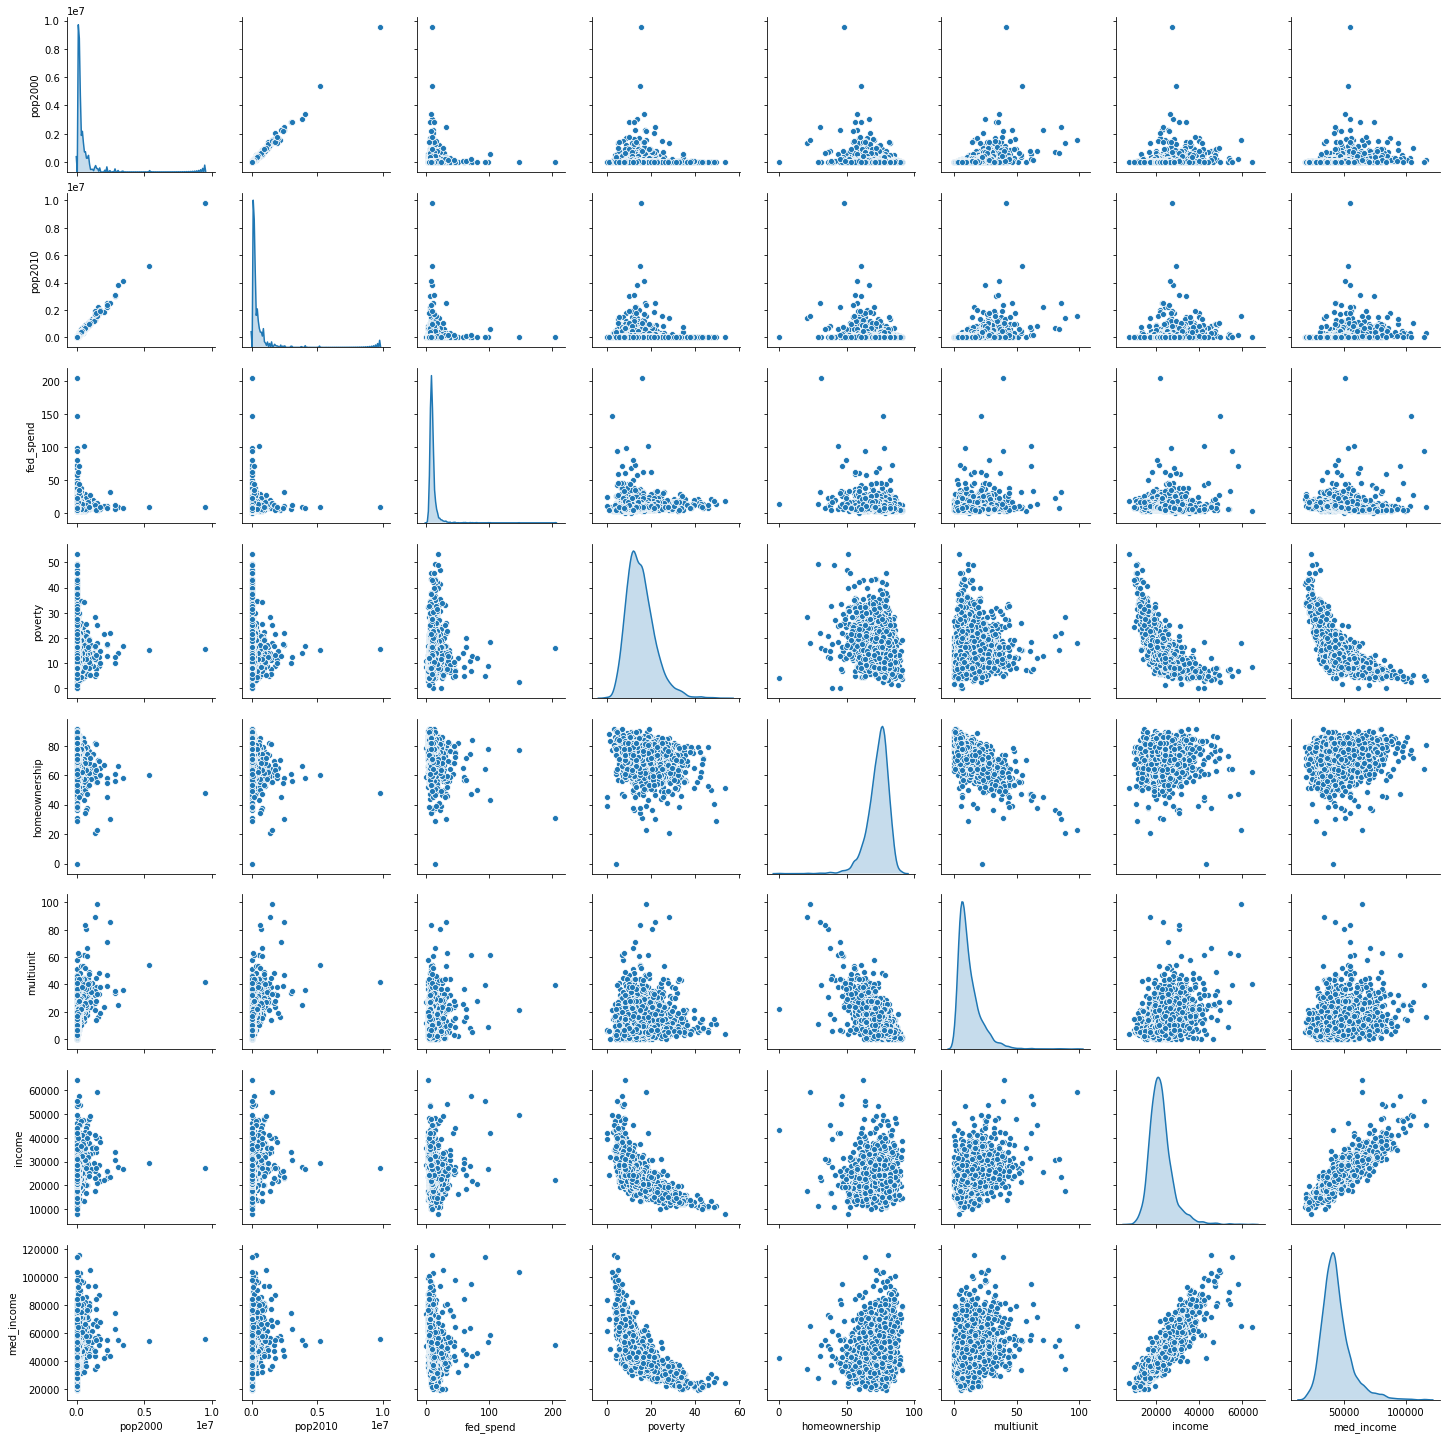

In [32]:
sns.pairplot(county, diag_kind='kde');

## <span style=color:red><u>4 STEP</u> :FORMULATE HYPOTHESIS</span>

## <span style=color:darkgreen>Fitting a line by least squares regression</span>

<span style=color:blue><b>Scatterplots</b></span> were introduced as a graphical technique to present <span style=color:blue>two numerical variables simultaneously</span>. Such plots <span style=color:blue>permit the <u>relationship between</u> the variables</span> to be examined with ease.   

Straight lines <span style=color:red><b>should only be used</b></span> when the data appear to have a linear relationship.

### <span style=color:darkred>An objective measure for finding the <u>Best</u> line</span>

<div class="alert alert-block alert-warning"><u><b>What do we mean by “Best” ?</b></u><br>
<br/><br/>   
Mathematically, we want a <b>line that has small residuals</b>. We could apply a <b>criteria</b> that could <b><u>minimize</u></b> the <b><u>Sum of the Residual (SR)</u></b> magnitudes :<br>
<br/><br/>
\begin{align*}SR\:=\:e_1 + e_2 + · · · + e_n\end{align*}<br>
<br/><br/>
However, a more common practice is to choose the <b>line that minimizes</b> the <b><u>Sum of the Squared Residuals (SSR)</u></b>:<br>
<br/><br/>
\begin{align*}SSR\:=\:e^{2}_1 + e^{2}_2 + · · · + e^{2}_n\end{align*}<br>
</div>

### <span style=color:darkred>Conditions for the least squares line</span>

When <span style=color:blue><u>fitting</u> a <b>least squares line</b></span>, we generally require :    

- <span style=color:blue><b><u>Linearity</u></b></span>. The data should show a <span style=color:blue><b>linear</b> trend</span>. If there is a <span style=color:red><b>nonlinear</b> trend</span>, an <span style=color:blue>advanced regression method</span> should be applied.   
$%$   
- <span style=color:blue><b><u>Nearly normal residuals</u></b></span>. Generally the <span style=color:blue>residuals must be nearly normal</span>. When this condition is <span style=color:blue>found to be <b>unreasonable</b></span>, it is usually because of <span style=color:red><b>outliers</b></span> or concerns about <span style=color:blue><b>influential points</b></span>.   
$%$   
- <span style=color:blue><b><u>Constant variability</u></b></span>. The <b>variability of points</b> around the <span style=color:blue>least squares line</span> remains roughly <span style=color:blue><b>constant</b></span>.   
$%$   
- <span style=color:blue><b><u>Independent observations</u></b></span>. Be <span style=color:red><b>cautious</b></span> about applying regression to <span style=color:blue>time series</span> data, which are <span style=color:blue>sequential observations in time</span> such as a stock price each day. Such data may have an underlying structure that should be considered in a model and analysis.

### <span style=color:darkred>Finding the least squares line</span>

<div class="alert alert-block alert-warning">
<b>Parameters</b> are <b>estimated</b> using <b>observed data</b>. we can also find the <b>parameter estimates</b> by applying <u>two properties</u> of the <b>least squares line</b>:<br>
<br/>
- The <b><u>slope</u> of the least squares line</b> can be estimated by :   
<br/><br/> 
\begin{align*}b_1 = \frac{s_y}{s_x}R\end{align*}   
<br/><br/>
where <b>$\:R\:$</b> is the <span style=color:blue>correlation</span> between the <b>two variables</b>, and $\:s_x\:$ and $\:s_y\:$ are the <span style=color:blue>sample standard deviations</span> of the <b>explanatory variable</b> and <b>response</b>, respectively.   
<br/><br/>
- If <span style=color:blue>$\:\hat{x}\:$</span> is the <span style=color:blue><b>mean of the horizontal variable</b></span> (from the data) and <span style=color:blue>$\:\bar{y}\:$</span> is the <span style=color:blue><b>mean of the vertical variable</b></span> then the point <span style=color:blue>($\bar{x},\:\bar{y}$)</span> is on the <span style=color:blue>least squares line</span>.   
<br/><br/>
We use <span style=color:blue>$\:b_0\:$</span> and <span style=color:blue>$\:b_1\:$</span> to represent the <span style=color:blue><b>point estimates</b> of the parameters</span> <span style=color:blue>$\:\beta_0\:$</span> and <span style=color:blue>$\:\beta_1\:$</span>.
</div>

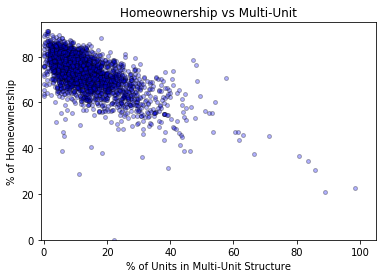

In [61]:
# Create data
x = county.multiunit
y = county.homeownership
colors = 'Blue'

area = np.pi*5
plt.axis([-1, 105, 0, 95])

# Plot
plt.scatter(x, y, s=area, alpha=0.3, c=colors, edgecolor='black')
plt.title('Homeownership vs Multi-Unit')
plt.ylabel('% of Homeownership')
plt.xlabel('% of Units in Multi-Unit Structure')
plt.show()

We could write the equation of the <span style=color:blue><b>y</b> = homeownership</span> and <span style=color:blue><b>x</b> = multiunit,</span> <span style=color:blue>least squares regression line</span> as :   
$%$   
\begin{align*}\hat{homeownership}\:=\:\beta_0\:+\:\beta_1\:x\:multiunit\:+\:\epsilon\end{align*}    
$%$   
Here the equation is set up to <span style=color:blue><b>predict</b></span> $\:homeownership\:$ based on $\:multiunit\:$ variable. These two values, $\:\beta_0\:$ and $\:\beta_1\:$, are the <span style=color:blue>parameters</span> of the <b>regression line</b>.


<span style=color:darkblue><b><u>EXAMPLE 8.1</u></b></span>   
$%$   
Using the summary statistics, we can compute the <span style=color:blue>slope for the regression line</span> of <b>multiunit structure</b> against <b>homeownership</b>.   

In [62]:
countyReg = county[['homeownership', 'multiunit']]
countyReg.std().round(2)

homeownership    7.83
multiunit        9.29
dtype: float64

In [35]:
countyReg.corr().round(3)

,homeownership,multiunit
homeownership,1.000,-0.672
multiunit,-0.672,1.000



\begin{align*}b_1 = \frac{s_y}{s_x}R\:=\:\frac{7.83}{9.29}(-0.672)\:=\:-0.56\end{align*}

<div class="alert alert-block alert-warning"><u>Identifying the <b>least squares line</b> from summary statistics</u>   
<br/><br/>
To <b><i>identify the least squares line from summary statistics</i></b> :   
<br/><br/>
• Estimate the <b>slope parameter, $\:b_1\:$</b>.   
<br/><br/>
• Noting that the point ($\:\bar{x}\:,\:\bar{y}$) is on the <b>least squares line</b>, use $\:x_0\:=\:\bar{x}\:$ and $\:y_0\:=\:\bar{y}\:$ along with the <b>slope</b> $\:b_1\:$ in the <b><u>point-slope</u></b> equation:   
<br/><br/>
\begin{align*}y − \bar{y} = b_1(x − \bar{x})\end{align*}   
<br/><br/>
• Simplify the equation.
</div>

In [36]:
# select the point (x,y)

countyReg.mean().round(2)

homeownership    73.26
multiunit        12.33
dtype: float64

<span style=color:darkblue><b><u>EXAMPLE 8.2</u></b></span>   

Using the point <span style=color:blue><b>($\:\bar{x}\:,\:\bar{y}$)</b> = (12.33, 73.26)</span> from the <span style=color:blue><b>sample means</b></span> and the <span style=color:blue><b>slope estimate</b> $\:b_1\:$ = −0.56</span> from <span style=color:darkblue><b><u>EXAMPLE 8.1</u></b></span>, find the <span style=color:darkblue>least-squares line</span> for <u>predicting</u> $\:homeownership\:$ based on $\:multiunit\:$.   

\begin{align*}y − \bar{y} = b_1(x − \bar{x})\end{align*}   
$%$   
\begin{align*}y − 73.26 = -0.56(x − 12.33)\end{align*}   
$%$   
Expanding the right side and then <b>adding 73.26</b> to each side, the equation simplifies to :   
$%$   
\begin{align*}y = 80.24 -0.56x\end{align*}   
$%$   
Putting the equation into context :   

\begin{align*}\hat{homeonwership} = 80.24 - 0.56\:x\:multiunit\end{align*}   


In [63]:
x = countyReg.multiunit
y = countyReg.homeownership

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("intercept: %f;  slope: %f;  std. error: %f  p-value: %f;  R value: %f; R-square: %f." % 
      (intercept, slope, std_err, p_value, r_value, r_value**2))

intercept: 80.249818;  slope: -0.566763;  std. error: 0.011134  p-value: 0.000000;  R value: -0.672351; R-square: 0.452055.


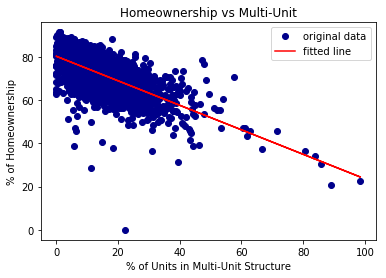

In [64]:
# linear regression line fitting

plt.plot(x, y, 'o', label='original data',color='darkblue')
plt.plot(x, intercept + slope * x, 'r', label='fitted line') # equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥
plt.legend()
plt.title('Homeownership vs Multi-Unit')
plt.ylabel('% of Homeownership')
plt.xlabel('% of Units in Multi-Unit Structure')
plt.show()

<div class="alert alert-block alert-warning"><u>Interpreting parameters estimated by least squares</u>   
<br/><br/>
The <b>slope</b> describes the <b>estimated difference</b> in the $\:y\:$ variable if the <b>explanatory variable</b> $\:x\:$ for a case happened to be one unit larger.   
<br/><br/>
The <b>intercept</b> describes the <b>average outcome</b> of $\:y\:$ if $\:x\:$ = 0 and the linear model is valid all the way to $\:x\:$ = 0, which in many applications is not the case.
</div>

## <span style=color:green>Create a model  and fit it</span>

### <span style=color:darkred>Splitting the dataset into Train and Test sets</span>

In [39]:
X = county['multiunit'].values.reshape(-1,1)
y = county['homeownership'].values.reshape(-1,1)

In [40]:
X

array([[ 7.2],
       [22.6],
       [11.1],
       ...,
       [17. ],
       [10. ],
       [ 6.5]])

 we split <span style=color:blue><b>80%</b> of the data to the <b>training set</b></span> while <span style=color:blue><b>20%</b> of the data to the <b>test set</b></span> using below code.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2514, 1), (629, 1), (2514,), (629,))

After splitting the data into <span style=color:blue><b>training</b> and <b>testing sets</b></span>, finally, the time is to <span style=color:blue><b>train</b> our algorithm</span>. For that, we need :   
1. to import <span style=color:blue><b>LinearRegression class</b></span>,   
2. instantiate it, and   
3. call the <span style=color:blue><b>fit() method</b></span> along with our <span style=color:blue><b>training data</b></span>.

The <span style=color:blue>regression model</span> based on <span style=color:blue><b>Ordinary Least Squares - OLS</b></span> is an instance of the class <span style=color:blue><i>statsmodels.regression.linear_model.OLS</i></span>.   

This is how you can create our model. Once your model is created, you can apply <span style=color:blue><b>.fit()</b></span> on it: :

In [67]:
# Fit regression model and its summary statistics

data = {"x1" : X_train, "y" : y_train}

county_model = smf.ols('y ~ x1', data=data).fit()

print(county_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     2192.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:20:20   Log-Likelihood:                -7967.8
No. Observations:                2514   AIC:                         1.594e+04
Df Residuals:                    2512   BIC:                         1.595e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.2985      0.189    423.983      0.0

<div class="alert alert-block alert-danger">   
$%$  
<b><u>You should be careful here!</u></b>$\hspace{3mm}$ Please, notice that the <u>first argument</u> is the <b>output</b>, followed with the <b>input</b>.</div>

By calling <span style=color:blue><b>.fit()</b></span>, you obtain the variable <span style=color:blue><b>county_model</b></span>. This object holds a lot of information about the regression model.

<b><u>We’ll describe the meaning of the columns</u></b> :   
$%$   
- The <b>first column</b> provides the <span style=color:blue>point estimate for $\:b_0\:$ and $\:b_1\:$</span>, as we calculated in an earlier example : <b>-0.5668</b>.   
- The <b>second column</b> is a <span style=color:blue>standard error</span> for this point estimate: <b>0.011</b>.   
- The <b>third column</b> is a <span style=color:blue>t-test statistic</span> for the <span style=color:blue>null hypothesis that $\:b_1\:$ = 0 :</span>$\hspace{3mm}$ <b>T = −50.905</b>.   
- The <b>last column</b> is the <span style=color:blue>p-value</span> for the <span style=color:blue>t-test statistic for the null hypothesis $\:b_1\:$ = 0</span> and a <span style=color:blue><u>two-sided alternative hypothesis</u></span>: <b>0.000</b>.


We can extract any of the values from the table above - <span style=color:blue><b>Ordinary Least Squares - OLS</b></span>. For instance :

In [44]:
print('coefficient of determination:', county_model.rsquared.round(3))

coefficient of determination: 0.466


In [45]:
print('adjusted coefficient of determination:', county_model.rsquared_adj.round(3))

adjusted coefficient of determination: 0.466


In [46]:
print('regression coefficients:', county_model.params.round(3))

regression coefficients: Intercept    80.298
x1           -0.570
dtype: float64


To find more information about the results of linear regression, please visit the [official documentation page](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html).

## <span style=color:green>Using $\:R^2\:$ to describe the strength of a fit</span>

In [47]:
# extracting std deviation to calculate the variance for R^2
countyReg.std().round(3)

homeownership    7.832
multiunit        9.291
dtype: float64

In [48]:
countyReg.var().round(3)

homeownership    61.334
multiunit        86.315
dtype: float64

<div class="alert alert-block alert-warning"><u>$\:R^2\:$</u>   
<br/><br/>   
We <span style=color:blue>evaluated the strength of the linear relationship between two variables</span> earlier using the <span style=color:blue><u><b>correlation</b>, $\:R\:$</u></span>.   
<br/><br/>
However, it is more common to explain the <span style=color:blue><u><b>strength of a linear fit</b></u></span> using <span style=color:blue>$\:R^2\:$, called <b>R-squared</b></span>. If provided with a linear model, we might like to describe how closely the data cluster around the linear fit.   
<br/><br/>
The <span style=color:blue>$\:R^2\:$</span> of a <b>linear model</b> describes the <span style=color:blue>amount of variation in the response</span> that is <b>explained</b> by the <span style=color:blue>least squares line</span>.    
<br/><br/>
</div>

For example, the <span style=color:blue><b>variance</b></span> of the <b>response variable</b>, $homeownership$, is $\:s^2_{home}\:$ = 62.25. However, if we apply our <b>least squares line</b>, then this model reduces our uncertainty in predicting $homeownership$ using a $multiunit$. The variability in the residuals describes how much variation remains after using the model: $\:s^2_{multi}\:$ = 86.62. In short, there was a reduction of   
$%$   
\begin{align*}\frac{s^2_{home}-s^2_{multi}}{s^2_{home}}\:=\:\frac{62.25-86.62}{62.25}\:=\:\frac{24.37}{62.25}\:=\:0.39\end{align*}   
$%$   
or about <b>39%</b> in the <b>data’s variation</b> by using information about $\:multiunit\:$ for <b><u>predicting</u></b> $\:homeownership\:$ using a <b>linear model</b>. This corresponds exactly to the <span style=color:blue>R-squared value</span>:   
$%$   
\begin{align*}R\:=\:−0.657\hspace{5cm}R^2\:=\:0.39\end{align*}

In [49]:
print(" correlation R: %f" % r_value)
print("R-squared: %f" % r_value**2)

 correlation R: -0.672351
R-squared: 0.452055


# <span style=color:darkgreen>Predict response</span>

In [50]:
print("Making predictions of homeownership for the following 6 houses :")
print(X_test[0:6])

Making predictions of homeownership for the following 6 houses :
[[ 4.7]
 [ 7.5]
 [19.4]
 [ 7.3]
 [ 9.9]
 [ 5.1]]


In [68]:
predicted_y = county_model.predict(exog=dict(x1=X_test))
print("The predictions are:")
print(predicted_y.head().round(2))

The predictions are:
0    77.62
1    76.02
2    69.24
3    76.14
4    74.65
dtype: float64


In [52]:
y_test[0:6]

array([[78.6],
       [80.9],
       [78.4],
       [77.9],
       [74.2],
       [67.8]])

# <span style=color:darkgreen>Model Validation</span>

You'll want to <span style=color:blue><b>evaluate</b> almost every <u>model</u> you ever build</span>. In most (though not all) applications, the relevant mesure of model quality is <span style=color:blue><b>predictive accuracy</b></span>. In other words, <span style=color:blue><i><u>will the model's predictions be close to what acctually happens</u></i></span>.
<br/><br/>
<div class="alert alert-block alert-warning"><b><u>Model Validation</u></b>   
<br/><br/>
<span style=color:blue><b><u>Model Validation</u></b></span> measure the <span style=color:blue><b>quality of your model</b></span>. Measuring <span style=color:blue>model quality</span> is the <b>key</b> to iteratively improving your models.   
<br/><br/>
we'll use <span style=color:blue><b>Mean Absolute Error - MAE</b></span>. Let's break down this metric starting with the last word <b><i>error</i></b>.   
<br/><br/>
The <span style=color:blue>prediction error</span>$\:$ for each case or observation is :   
<br/><br/>
- <span style=color:blue><b>Mean Absolute Error - MAE</b></span>$\hspace{2mm}$=$\hspace{2mm}y_{test} - predicted_{y}$   
<br/><br/>
With the **MAE** metric, we take the ***absolute value*** of each <u>*error*</u>.   
<br/><br/>
This converts each <u>*error*</u> to a positive number. We then take the average of those abosulte <u>*errors*</u>.   
<br/><br/>
This is our measure of model quality. In plain English, it can be said as :    
<br/><br/>
On average, our <b>predictions are off</b> by about the calculated <span style=color:blue><b>Mean Absolute Error - MAE</b></span>.   
</div>   


<br/><br/>
So, if a $\:homeownership\:$ observation equals <b>73.30</b> and you predicted it would be <b>76.02</b> the <span style=color:blue><b>Mean Absolute Error - MAE</b></span> is <b>2.72</b>.


In [69]:
from sklearn.metrics import mean_absolute_error

In [70]:
print(mean_absolute_error(y_test, predicted_y).round(2))

4.32


In [71]:
print(predicted_y.mean().round(2), y_test.mean().round())

73.36 73.0


## <span style=color:green>Residuals</span>

<div class="alert alert-block alert-warning"><b><u>Residuals</u></b>   
<br/><br/>   
<span style=color:blue><b><u>Residuals</u></b></span> are the <b>leftover variation</b> in the data <b>after</b> accounting for the <b>model fit</b>:   
<br/><br/>
\begin{align*}Data\:=\:Fit\:+\:Residual\end{align*}    
<br/><br/>
Each <b>observation</b> will have a <b>residual</b>.   
<br/><br/>
- If an <b>observation</b> is above the regression line, then its <b>residual</b>, the <i>vertical distance</i> from the <b>observation</b> to the <b>line</b>, is <u>positive</u>.   
<br/><br/>
- <b>Observations</b> below the <b>line</b> have <b>negative residuals</b>.   
<br/><br/>
One goal in picking the right linear model is for these <b>residuals</b> to be <i><b>as small as</b> possible</i>.   
<br/><br/>
<b><u>Difference between Observed and Expected</u></b>   
<br/><br/>   
The <b>residual</b> of the $\:i^{th}\:$ <b>observation</b> ($\:x_i\:,\:y_i\:$) is the <b>difference</b> of the <b><u>observed response</u></b> ($\:y_i\:$) and the <b><u>response</u></b> we would <b>predict</b> based on the <b><u>model fit</u></b> ($\:\hat{y}_{i}\:$) :   
<br/><br/>
\begin{align*}e_i\:=\:y_i\:−\:\hat{y}_{i}\end{align*}   
<br/><br/>
We typically <b>identify $\:\hat{y}_{i}\:$ by plugging $\:x_i\:$ <u>into the model</u></b>.   
</div>

<b>Residuals</b> are helpful in <b>evaluating</b> how well a <span style=color.blue>linear model fits</span> a dataset. We often display them in a <span style=color:blue><b>residual plot</b></span>.   

One purpose of residual plots is to identify characteristics or patterns still apparent in data after fitting a model.

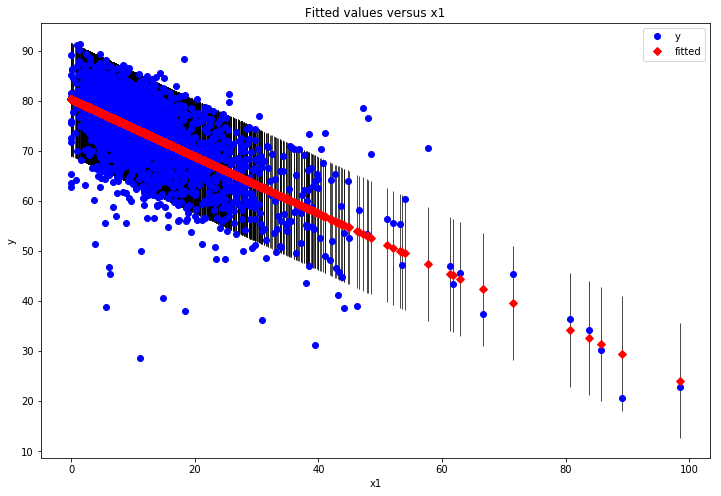

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))
# ig = sm.graphics.plot_fit(county_model, "homeownership", ax=ax)
fig = sm.graphics.plot_fit(county_model, "x1", ax=ax)